<img width="10%" alt="Naas" src="https://landen.imgix.net/jtci2pxwjczr/assets/5ice39g4.png?w=160"/>

# Extract and Analyze Twitter Data

<br>

<a href="https://app.naas.ai/user-redirect/naas/downloader?url=https://raw.githubusercontent.com/jupyter-naas/awesome-notebooks/master/template.ipynb" target="_parent">
<img src="https://img.shields.io/badge/-Open%20in%20Naas-success?labelColor=000000&logo="/>
</a>

**Author:** Tannia Dubon
**Tags:** #twitter #scrape #nlp #sentiment #classification

## Input

The tweet data is retrieved using the Twitter Developer Platform and spaCy models are used for natural language processesing. Binary classification is used to score the sentiment of the tweets; 1 designated as positive, 0 as negative and a .5 threshold.
Use this worksheet to update the query and conduct your own research! 

### Install required packages as necessary
Download the spaCy English pipeline from the terminal window: python -m spacy download en_core_web_lg

In [ ]:
%pip install requests
%pip install pandas
%pip install pyyaml 
%pip install datetime
%pip install pandas
%pip install numpy
%pip install datetime
%pip install matplotlib 
%pip install wordcloud

%pip install seaborn
%pip install spacy

In [8]:
import os
import requests
import pandas as pd
import json
import ast
import yaml 

In [58]:
import datetime
import pandas as pd
import numpy as np
from datetime import datetime, date

import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import re
import seaborn as sns
import string
import warnings
import random
import spacy
from spacy.training import Example
from spacy.pipeline.textcat import DEFAULT_SINGLE_TEXTCAT_MODEL

### Setup Bearer Token to Use Twitter API
Save your Twitter token in a plain text file, with a .yaml exension, containing only the following:

BEARER_TOKEN: "***"

In [11]:
#AUTHENTICATION SETUP

#function to read in YAML file containing your bearer token
def process_yaml():
    with open("/Users/tdubon/twitter/config.yaml") as file:
        return yaml.safe_load(file)
     
#access bearer token
def create_bearer_token(data):
    return data["BEARER_TOKEN"] 


#connect to Twitter API
def twitter_auth_and_connect(bearer_token, url):
    headers = {"Authorization": "Bearer{}".format(bearer_token)}
    response = requests.request("GET", url, headers=headers)
    return response.json()  

### Retrieve data from Twitter
Enter keywords for query in the create_url() function. 
See https://tinyurl.com/2j5phrhu for instructions on customizing your query syntax

In [12]:
def create_url():
    query='(Putin OR Lukashenka OR Russia OR "Vladimir Putin") -is:retweet lang:en'
    query2='(Zelensky OR Ukraine OR Kyiv OR Kharkiv OR Chernihiv OR Mykolaiv OR Mariupol OR "Volodymyr Zelenskyy") -is:retweet lang:en'
    tweet_fields = "tweet.fields=created_at,public_metrics,context_annotations,text,possibly_sensitive,geo"
    url = "https://api.twitter.com/2/tweets/search/recent?query={}&{}".format(query, tweet_fields)
    return url

def create_headers(bearer_token):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}
    return headers

def connect_to_endpoint(url, headers):
    response = requests.request("GET", url, headers=headers)
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

In [ ]:
#Update path below to save to your own desktop

def main():
    url= create_url()
    data = process_yaml()
    bearer_token = create_bearer_token(data)
    headers = create_headers(bearer_token)
    json_response = connect_to_endpoint(url, headers)
    print(json.dumps(json_response, indent=4, sort_keys=True))
    with open("/Users/tdubon/twitter/downloaded_tweets.json", "w") as json_file:
        json.dump(json_response, json_file)
        
if __name__ == "__main__":
    main()

main()

### Extract Data from JSON File

In [16]:
#read the JSON file back in
with open("/Users/tdubon/twitter/downloaded_tweets.json", "r") as f:
    read_content = json.load(f)

In [ ]:
#inspect json data
read_content["data"]

In [18]:
len(read_content["data"])

10

#### Define functions to retrieve each tweet field of interest

In [32]:
#Initialize Lists
id_data = []
date_data = [] 
rtwt_data = []
reply_data = []
text_data = []

In [33]:
def get_id():
    for data in read_content["data"]:
        id_record = data["id"]
        id_data.append(id_record)

def get_created_at():
    for data in read_content["data"]:
        date_record = data["created_at"]
        date_data.append(date_record)
   

def retweet_count():
    for retweets in read_content["data"]:
        rtwt_count=retweets["public_metrics"]["retweet_count"] 
        rtwt_data.append(rtwt_count)

def reply_count():
    for reply in read_content["data"]:
        reply_count = reply["public_metrics"]["reply_count"]
        reply_data.append(reply_count)

        
def get_text():
    for data in read_content["data"]:
        text_record = data["text"]
        text_data.append(text_record)
                
def get_domain():
    d_id = []
    d_name = []
    d_desc = []
    d_twt_id = []
    
    for j in read_content["data"]:
        for i in j:
            if i == "context_annotations":
                for d in j["context_annotations"]:
                    d_id.append(d["domain"]["id"])
                    d_name.append(d["domain"]["name"])
                    d_desc.append(d["domain"]["description"])
                    d_twt_id.append(j["id"])
                    
    domain = {"id": d_id, "name": d_name, "desc": d_desc,"tweet id": d_twt_id}
    return domain


def get_entity():    
    e_id = []
    e_name = []
    e_desc = []
    e_twt_id = []

    for j in read_content["data"]:
        for i in j:
            if i == "context_annotations":
                for d in j["context_annotations"]:
                    e_id.append(d["entity"]["id"])
                    e_name.append(d["entity"]["name"])
                    e_twt_id.append(j["id"])
                
    entity = {"id": e_id, "name": e_name, "desc": e_desc,"tweet id": e_twt_id}
    return entity

In [34]:
def main():
    get_id() 
    get_created_at() 
    retweet_count()
    reply_count() 
    get_text()
    get_domain()
    get_entity()

main()

In [35]:
#inspect output
print(get_entity())

{'id': ['864931126132985856', '864931126132985856', '1139123917073707008', '864931126132985856', '864931126132985856', '864931126132985856', '864931126132985856', '1054463473948577792', '1054463473948577792', '10040395078', '864931126132985856', '10040395078', '864931126132985856', '864931126132985856', '864931126132985856', '864931126132985856', '864931126132985856', '864931126132985856', '864931126132985856', '799022225751871488', '1070710947310788608', '799022225751871488', '1486458201117642754', '1070710947310788608', '864931126132985856', '864931126132985856', '864931126132985856', '864931126132985856'], 'name': ['Vladimir Putin', 'Vladimir Putin', 'Asha Rangappa', 'Vladimir Putin', 'Vladimir Putin', 'Vladimir Putin', 'Vladimir Putin', 'Kyle Griffin', 'Kyle Griffin', 'Joe Biden', 'Vladimir Putin', 'Joe Biden', 'Vladimir Putin', 'Vladimir Putin', 'Vladimir Putin', 'Vladimir Putin', 'Vladimir Putin', 'Vladimir Putin', 'Vladimir Putin', 'Donald Trump', 'Glenn Greenwald', 'Donald Trum

In [36]:
print(get_domain())

{'id': ['10', '35', '10', '10', '35', '10', '35', '10', '94', '10', '10', '35', '35', '10', '35', '10', '35', '10', '35', '10', '10', '35', '67', '94', '10', '35', '10', '35'], 'name': ['Person', 'Politician', 'Person', 'Person', 'Politician', 'Person', 'Politician', 'Person', 'Journalist', 'Person', 'Person', 'Politician', 'Politician', 'Person', 'Politician', 'Person', 'Politician', 'Person', 'Politician', 'Person', 'Person', 'Politician', 'Interests and Hobbies', 'Journalist', 'Person', 'Politician', 'Person', 'Politician'], 'desc': ['Named people in the world like Nelson Mandela', 'Politicians in the world, like Joe Biden', 'Named people in the world like Nelson Mandela', 'Named people in the world like Nelson Mandela', 'Politicians in the world, like Joe Biden', 'Named people in the world like Nelson Mandela', 'Politicians in the world, like Joe Biden', 'Named people in the world like Nelson Mandela', "A journalist like 'Anderson Cooper'", 'Named people in the world like Nelson Ma

In [37]:
print(len(id_data), len(date_data), len(rtwt_data), len(reply_data), len(text_data))

10 10 10 10 10


### Save data to pandas dataframe and clean and format text

In [39]:
#saved tweet fields doe not include entity or domain data
save_data = {"id": id_data, "date": date_data, "retweet count": rtwt_data, "reply count": reply_data, "text": text_data}
df = pd.DataFrame(save_data)
df.columns
df.head()
df.to_csv("/Users/tdubon/twitter/pol_tweet_data.csv")

In [40]:
len(df)

10

In [41]:
print(df.head())

                    id                      date  retweet count  reply count  \
0  1514043870597853193  2022-04-13T00:52:42.000Z              0            0   
1  1514043870149066754  2022-04-13T00:52:42.000Z           5800            0   
2  1514043869482172416  2022-04-13T00:52:42.000Z              0            0   
3  1514043868949454856  2022-04-13T00:52:42.000Z              0            0   
4  1514043868693553152  2022-04-13T00:52:42.000Z            402            0   

                                                text  
0  @313Waly @PAGAL93 @russia_urdu میں تم کو وارنن...  
1  RT @IAPonomarenko: Are.\nYou. \nJust.\nKidding...  
2  @AshaRangappa_ @JoyceWhiteVance I think it was...  
3  @CarmenGranja5 Disfarçar feminismo, do qual so...  
4  RT @kylegriffin1: President Biden: "Putin is j...  


In [42]:
def cleanup_text(file, rem_item):
    r = re.findall(rem_item, file)
    for i in r:
        file = re.sub(i, "", file)
    return file

In [43]:
#remove handles
df["clean text"] = np.vectorize(cleanup_text)(df["text"], "@[\w]*")
df["clean text"].head()

0       میں تم کو وارننگ دے رہا ہوں کہ گالیاں نہیں ...
1    RT : Are.\nYou. \nJust.\nKidding.\nMe?!!\nVikt...
2      I think it was more likely it was the Fly th...
3     Disfarçar feminismo, do qual sou apoiante à m...
4    RT : President Biden: "Putin is just trying to...
Name: clean text, dtype: object

In [44]:
len(df["clean text"])
print(df["clean text"])

0       میں تم کو وارننگ دے رہا ہوں کہ گالیاں نہیں ...
1    RT : Are.\nYou. \nJust.\nKidding.\nMe?!!\nVikt...
2      I think it was more likely it was the Fly th...
3     Disfarçar feminismo, do qual sou apoiante à m...
4    RT : President Biden: "Putin is just trying to...
5    RT : Según el presidente Putin, lo que está pa...
6    RT : Putin’s justifications for the war in Ukr...
7      Koch likes Pence. Koch likes Putin.\n\nKoch ...
8    RT : Democrats blamed their 2016 loss on Putin...
9    RT : #BreakingNews Kyiv had rejected a visit b...
Name: clean text, dtype: object


### Tokenize text in spaCy

In [45]:
#convert to tokens
nlp = spacy.load("en_core_web_lg") #here you can load a model that you'd previously trained
text = str(df["clean text"])
doc = nlp(text)

In [46]:
tokens_list = [] 
for token in doc:
    tokens_list.append(token)

tokens_list

[0,
       ,
 میں,
 تم,
 کو,
 وارننگ,
 دے,
 رہا,
 ہوں,
 کہ,
 گالیاں,
 نہیں,
 ...,
 ,
 1,
    ,
 RT,
 :,
 Are.\nYou,
 .,
 \nJust.\nKidding.\nMe?!!\nVikt,
 ...,
 ,
 2,
      ,
 I,
 think,
 it,
 was,
 more,
 likely,
 it,
 was,
 the,
 Fly,
 th,
 ...,
 ,
 3,
     ,
 Disfarçar,
 feminismo,
 ,,
 do,
 qual,
 sou,
 apoiante,
 à,
 m,
 ...,
 ,
 4,
    ,
 RT,
 :,
 President,
 Biden,
 :,
 ",
 Putin,
 is,
 just,
 trying,
 to,
 ...,
 ,
 5,
    ,
 RT,
 :,
 Según,
 el,
 presidente,
 Putin,
 ,,
 lo,
 que,
 está,
 pa,
 ...,
 ,
 6,
    ,
 RT,
 :,
 Putin,
 ’s,
 justifications,
 for,
 the,
 war,
 in,
 Ukr,
 ...,
 ,
 7,
      ,
 Koch,
 likes,
 Pence,
 .,
 Koch,
 likes,
 Putin.\n\nKoch,
 ...,
 ,
 8,
    ,
 RT,
 :,
 Democrats,
 blamed,
 their,
 2016,
 loss,
 on,
 Putin,
 ...,
 ,
 9,
    ,
 RT,
 :,
 #,
 BreakingNews,
 Kyiv,
 had,
 rejected,
 a,
 visit,
 b,
 ...,
 ,
 Name,
 :,
 clean,
 text,
 ,,
 dtype,
 :,
 object]

In [49]:
#Review entities recognized
for ent in doc.ents:
    print(ent.text, ent.label_)

0 CARDINAL
1 CARDINAL
\nJust.\nKidding.\nMe?!!\nVikt GPE
2 CARDINAL
3 CARDINAL
Disfarçar ORG
4 CARDINAL
Biden PERSON
Putin PERSON
5 CARDINAL
presidente Putin PERSON
lo que está pa... PERSON
6 CARDINAL
Putin PERSON
7 CARDINAL
Pence PERSON
Koch PERSON
8 CARDINAL
Democrats NORP
2016 DATE
Putin PERSON
9 CARDINAL
BreakingNews Kyiv ORG


In [50]:
#Add a category for entities of interest, if needed. 
from spacy.matcher import PhraseMatcher 
matcher = PhraseMatcher(nlp.vocab) 

#define politicians as entities 
terms = ["Putin", "Zelensky"] 
patterns = [nlp.make_doc(term) for term in terms] 
matcher.add("politiciansList", None, *patterns) 

matches = matcher(doc) 

#this prints out the spans where the instances are found and the entity identified
for mid, start, end in matches: 
    print(start, end, doc[start:end])

59 60 Putin
73 74 Putin
85 86 Putin
116 117 Putin


## Model

### Text Classification

In [51]:
config = {
    "threshold": 0.5,
    "model": DEFAULT_SINGLE_TEXTCAT_MODEL }

textcat = nlp.add_pipe("textcat", config=config) 

In [54]:
#create training data for your example consisting of examples of positive and negative sentiment
train_data = [("Helping refugees. This is what kindness looks like.", {"cats": {"POS": True}}),
              ("In this time of uncertainty, we have a clear way forward: Help Ukraine defend itself. Support the Ukrainian people. Hold Russia accountable.", {"cats": {"POS": True}}),
              ("Priests demand head of Ukrainian Orthodox Church Moscow Patriarchate be brought to church tribunal for position on war.", {"cats": {"POS": True}}),
              ("Mayor of the most northern village in Ukraine Hremiach Hanna Havrylina was released after yesterday’s prisoners’ swap.", {"cats": {"POS": True}}),
              ("Look at this female volunteer from Belarus fighting alongside Ukrainians.", {"cats": {"POS": True}}),
              ("Russian soldiers: They're animals... Humans don't behave like this. My parents told me about WW2 & the fascists didn't even do such things.", {"cats": {"NEG": True}}),
              ("All Russians are evil", {"cats": {"NEG": True}}),
              ("The West is pushing Ukraine toward a conflict.", {"cats": {"NEG": True}}),
              ("Cowards", {"cats": {"NEG": True}}),
              ("Russia’s deployment of combat forces is a mere repositioning of troops on its own territory.", {"cats": {"NEG": True}}),
              ("Ukraine and Ukrainian government officials are the aggressor in the Russia-Ukraine relationship.", {"cats": {"NEG": True}})] 

In [55]:
textcat.add_label("POS")
textcat.add_label("NEG")
    
train_examples = [Example.from_dict(nlp.make_doc(text), label) for text,label in train_data] 

In [56]:
textcat.initialize(lambda: train_examples, nlp=nlp)

In [59]:
#Define training example

epochs = 20

#Disable other pipe components & define training loop to incorporate statistical information

with nlp.select_pipes(enable="textcat"):
    optimizer = nlp.resume_training() #Creates optimizer object
    for i in range(epochs):
        random.shuffle(train_data)
        for text, label in train_data:
            doc = nlp.make_doc(text)
            example = Example.from_dict(doc, label) 
            print(nlp.update([example], sgd=optimizer))

{'textcat': 0.25}
{'textcat': 0.25500524044036865}
{'textcat': 0.2589010000228882}
{'textcat': 0.24480295181274414}
{'textcat': 0.25490760803222656}
{'textcat': 0.2575450539588928}
{'textcat': 0.2627326250076294}
{'textcat': 0.25526320934295654}
{'textcat': 0.22870877385139465}
{'textcat': 0.2462317943572998}
{'textcat': 0.26446953415870667}
{'textcat': 0.22347864508628845}
{'textcat': 0.21766705811023712}
{'textcat': 0.22705990076065063}
{'textcat': 0.19442616403102875}
{'textcat': 0.2183307409286499}
{'textcat': 0.21633052825927734}
{'textcat': 0.21402384340763092}
{'textcat': 0.2060631811618805}
{'textcat': 0.249767005443573}
{'textcat': 0.18573309481143951}
{'textcat': 0.15079669654369354}
{'textcat': 0.16435252130031586}
{'textcat': 0.12725785374641418}
{'textcat': 0.14863502979278564}
{'textcat': 0.17705675959587097}
{'textcat': 0.14681510627269745}
{'textcat': 0.11564951390028}
{'textcat': 0.148309588432312}
{'textcat': 0.14384546875953674}
{'textcat': 0.13640262186527252}
{'tex

In [60]:
#enter an example tweet to test results
doc2 = nlp("As Russia continues to commit horrific atrocities against the Ukrainian people, we must take additional steps to cut off")

print(doc2.cats)

{'POS': 0.5506177544593811, 'NEG': 0.4493822455406189}


In [61]:
#enter another example
doc3 = nlp("One of the captured Russian soldiers who was sent by Putin to “denazify” Ukraine")
print(doc3.cats)

{'POS': 0.01599816232919693, 'NEG': 0.984001874923706}


In [62]:
#process each row in clean text column
df["nlp_proc"] = [nlp(i) for i in df["clean text"]]

In [63]:
#save positive/negative predictions to cats column
df["cats"] = [i.cats for i in df["nlp_proc"]]

In [64]:
#assign value of 1 to positive classification, 0 to negative
sc_val = []

for i in df["cats"]:
    if i["POS"] >= .5:
        sc_val.append(1)
    else:
        sc_val.append(0)

In [65]:
#append classification score to dataframe
df["score"] = sc_val
print(df.head())

                    id                      date  retweet count  reply count  \
0  1514043870597853193  2022-04-13T00:52:42.000Z              0            0   
1  1514043870149066754  2022-04-13T00:52:42.000Z           5800            0   
2  1514043869482172416  2022-04-13T00:52:42.000Z              0            0   
3  1514043868949454856  2022-04-13T00:52:42.000Z              0            0   
4  1514043868693553152  2022-04-13T00:52:42.000Z            402            0   

                                                text  \
0  @313Waly @PAGAL93 @russia_urdu میں تم کو وارنن...   
1  RT @IAPonomarenko: Are.\nYou. \nJust.\nKidding...   
2  @AshaRangappa_ @JoyceWhiteVance I think it was...   
3  @CarmenGranja5 Disfarçar feminismo, do qual so...   
4  RT @kylegriffin1: President Biden: "Putin is j...   

                                          clean text  \
0     میں تم کو وارننگ دے رہا ہوں کہ گالیاں نہیں ...   
1  RT : Are.\nYou. \nJust.\nKidding.\nMe?!!\nVikt...   
2    I think i

In [66]:
#check dataframe
df

,id,date,retweet count,reply count,text,clean text,nlp_proc,cats,score
0,1514043870597853193,2022-04-13T00:52:42.000Z,0,0,@313Waly @PAGAL93 @russia_urdu میں تم کو وارنن...,میں تم کو وارننگ دے رہا ہوں کہ گالیاں نہیں ...,"( , میں, تم, کو, وارننگ, دے, رہا, ہوں, کہ, گ...","{'POS': 0.21937572956085205, 'NEG': 0.78062427...",0
1,1514043870149066754,2022-04-13T00:52:42.000Z,5800,0,RT @IAPonomarenko: Are.\nYou. \nJust.\nKidding...,RT : Are.\nYou. \nJust.\nKidding.\nMe?!!\nVikt...,"(RT, :, Are, ., \n, You, ., \n, Just, ., \n, K...","{'POS': 0.8528706431388855, 'NEG': 0.147129356...",1
2,1514043869482172416,2022-04-13T00:52:42.000Z,0,0,@AshaRangappa_ @JoyceWhiteVance I think it was...,I think it was more likely it was the Fly th...,"( , I, think, it, was, more, likely, it, was,...","{'POS': 0.40872564911842346, 'NEG': 0.59127438...",0
3,1514043868949454856,2022-04-13T00:52:42.000Z,0,0,"@CarmenGranja5 Disfarçar feminismo, do qual so...","Disfarçar feminismo, do qual sou apoiante à m...","( , Disfarçar, feminismo, ,, do, qual, sou, ap...","{'POS': 0.5844583511352539, 'NEG': 0.415541648...",1
4,1514043868693553152,2022-04-13T00:52:42.000Z,402,0,"RT @kylegriffin1: President Biden: ""Putin is j...","RT : President Biden: ""Putin is just trying to...","(RT, :, President, Biden, :, "", Putin, is, jus...","{'POS': 0.4801730215549469, 'NEG': 0.519826948...",0
5,1514043866915160068,2022-04-13T00:52:42.000Z,116,0,"RT @PetroDivisa: Según el presidente Putin, lo...","RT : Según el presidente Putin, lo que está pa...","(RT, :, Según, el, presidente, Putin, ,, lo, q...","{'POS': 0.5012431144714355, 'NEG': 0.498756915...",1
6,1514043866730549250,2022-04-13T00:52:42.000Z,3348,0,RT @maxseddon: Putin’s justifications for the ...,RT : Putin’s justifications for the war in Ukr...,"(RT, :, Putin, ’s, justifications, for, the, w...","{'POS': 0.8582465052604675, 'NEG': 0.141753420...",1
7,1514043866596397059,2022-04-13T00:52:42.000Z,0,0,@anthony7andrews @JoyceWhiteVance Koch likes P...,Koch likes Pence. Koch likes Putin.\n\nKoch ...,"( , Koch, likes, Pence, ., Koch, likes, Putin...","{'POS': 0.7482811808586121, 'NEG': 0.251718848...",1
8,1514043866550255621,2022-04-13T00:52:42.000Z,742,0,RT @ggreenwald: Democrats blamed their 2016 lo...,RT : Democrats blamed their 2016 loss on Putin...,"(RT, :, Democrats, blamed, their, 2016, loss, ...","{'POS': 0.1858828067779541, 'NEG': 0.814117193...",0
9,1514043866466463759,2022-04-13T00:52:41.000Z,15,0,RT @FordJohnathan5: #BreakingNews Kyiv had rej...,RT : #BreakingNews Kyiv had rejected a visit b...,"(RT, :, #, BreakingNews, Kyiv, had, rejected, ...","{'POS': 0.12598344683647156, 'NEG': 0.87401652...",0


In [67]:
#print out tweet id, text and score = to review results
for index, i in enumerate(df["score"]):
    if i == 1:
        print(df["id"][index], df["clean text"][index], df["score"][index])

1514043870149066754 RT : Are.
You. 
Just.
Kidding.
Me?!!
Viktor Medvedchuk, Putin’s main man in Ukraine, busted as a result of a Ukrainian spec o… 1
1514043868949454856  Disfarçar feminismo, do qual sou apoiante à muitos anos, com apoio à ditadura assassina e Bárbara de Putin é profundamente desonesto do ponto de vista intelectual! 1
1514043866915160068 RT : Según el presidente Putin, lo que está pasando en este momento es la destrucción del sistema de un mundo unipolar que se f… 1
1514043866730549250 RT : Putin’s justifications for the war in Ukraine:

– “the main goal is to help people”
– “we were forced to do it”
– “we couldn… 1
1514043866596397059   Koch likes Pence. Koch likes Putin.

Koch has cash.

This ain’t that hard. 1


## Output

### Display result

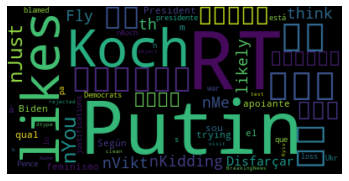

In [68]:
#wordcloud
wordcloud = WordCloud(stopwords = STOPWORDS, collocations=True).generate(str(tokens_list))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

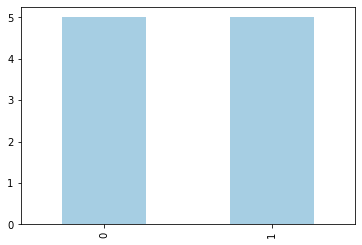

In [69]:
#plot
ax = df.score.value_counts().plot(kind="bar", colormap="Paired")
plt.show()

In [71]:
#Saving custom model - define where you would like your model to be saved. 

from pathlib import Path
output_dir=Path("/Users/tdubon/spaCy_models")

def save_model(output_dir):
    if output_dir is not None:
        output_dir = Path(output_dir)
        if not output_dir.exists():
            output_dir.mkdir()
        nlp.to_disk(output_dir)
        print("Saved model to", output_dir)
        
save_model(output_dir)

Saved model to /Users/tdubon/spaCy_models


In [ ]:
### To load trained, custom model on new data use:
#nlp = spacy.load("/Users/tdubon/spaCy_models")